# Principles of Automatic Control: Lead and Lag Compensation

## Introduction to Compensator Design

After gaining a thorough understanding of feedback performance characteristics, it's time to address the design aspects of control systems. An efficient way to delve into this topic is through the exploration of lead and lag compensators, employing examples for a comprehensive understanding. Previously, you have been introduced to the root locus method, which serves as a foundational concept for this discussion.

### The Concept of Lead and Lag Compensators

Lead and lag compensators are integral to modifying the dynamic response of control systems. They are characterized by a pole-zero configuration. In a **lead compensator**, a zero precedes a pole, enhancing the system's transient response by introducing a phase lead. Conversely, in a **lag compensator**, a pole precedes a zero, primarily used to improve steady-state accuracy without significantly affecting the transient response.

#### Lead Compensator Configuration

A lead compensator consists of a zero followed by a pole, particularly in the left-half plane, to ensure system stability. The general transfer function of a lead compensator, denoted as \(D(s)\), can be expressed as:

$$D(s) = \frac{s + \frac{1}{\tau}}{s + \frac{1}{\alpha \tau}}$$

where $\tau > 0$ is the time constant of the zero, and $\alpha$ is a constant less than 1 ($\alpha < 1$), dictating the distance between the pole and the zero. The closer $\alpha$ is to zero, the further apart the pole and zero are, which enhances the compensator's phase-lead characteristics.

</table>
<tr>
    <td>
        <img src="./pics/30_Compensator_Design_Using_Frequency_Response_Plots_lead_compensator.png" alt="30_Compensator_Design_Using_Frequency_Response_Plots_lead_compensator" style="width:350px;"/>
    </td>      
</tr>
</table>  



#### Example: Design Considerations for a Lead Compensator

Let's consider the design process for a lead compensator, where our goal is to adjust transient performance criteria such as settling time and overshoot. The design revolves around the strategic placement of the zero and pole to achieve a desired phase margin or equivalently, to ensure certain frequency domain specifications like bandwidth ($\omega_b$) and phase margin ($M_r$) are met.

**Design Parameters and Flexibility**

In addition to $\tau$ and $\alpha$, the gain $K_c$ plays a pivotal role in the compensator's effectiveness. This introduces three degrees of freedom in the design process: $K_c$, $\tau$, and $\alpha$. For simplicity, during the initial design stages, $K_c$ is often merged with the gain of the uncompensated system (and we call it $K$).

### Frequency Domain Analysis of Lead Compensators

The effectiveness of a lead compensator is predominantly evaluated through its frequency response. The transfer function in the frequency domain, $D(j\omega)$, is given by:

$$D(j\omega) = K_c \cdot \frac{\tau j\omega + 1}{\alpha \tau j\omega + 1}$$

To understand the impact of the compensator on the system's frequency response, let's examine the Bode plot characteristics of $D(j\omega)$.

</table>
<tr>
    <td>
        <img src="./pics/30_Compensator_Design_Using_Frequency_Response_Plots_lead_compensator_block_diagram.png" alt="30_Compensator_Design_Using_Frequency_Response_Plots_lead_compensator_block_diagram" style="width:350px;"/>
    </td>      
</tr>
</table>  



I want to find the values of $K$, $\tau$, and $\alpha$ so that the requirements on phase margin, bandwidth and velocity constant (or any other constant) are satisfied.

#### Magnitude and Phase Characteristics

Let's start from the compensator in the frequency domain; we would like to understand what contribution it gives to the Bode plot of the uncompensated system.


$$D(j\omega) = \frac{\tau j\omega + 1}{\alpha \tau j\omega + 1}$$


The magnitude plot of a lead compensator showcases a key feature: it starts at 0 dB, increases at +20 dB/decade after the zero's corner frequency ($\frac{1}{\tau}$), and flattens after the pole's corner frequency ($\frac{1}{\alpha \tau}$). This characteristic is important for increasing the system's gain margin and phase margin.

The phase plot reveals the compensator's ability to add a leading phase to the system. The maximum phase lead occurs between the zero and the pole's corner frequencies, providing a valuable tool for shaping the system's response to meet design specifications.

We can plot the Bode Plots of the Lead Compensator.

Note that the phase is 

$$
\Phi = \tan^{-1}(\omega\tau) - \tan^{-1}(\omega\alpha\tau)
$$

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from ipywidgets import interact, FloatSlider

# Function to plot the Bode plot of the lead compensator with annotations
def plot_lead_compensator_with_annotations(tau=1.0, alpha=0.5):
    # Define the transfer function of the lead compensator
    numerator = [tau, 1]
    denominator = [alpha*tau, 1]
    system = signal.TransferFunction(numerator, denominator)
    
    # Generate Bode plot data
    frequencies = np.logspace(-2, 2, 400)
    w, mag, phase = signal.bode(system, w=frequencies)
    
    # Calculate corner frequencies
    corner_freq_zero = 1/tau
    corner_freq_pole = 1/(alpha*tau)
    
    # Plotting
    plt.figure(figsize=(14, 6))
    
    ## Magnitude plot
    plt.subplot(1, 2, 1)
    plt.semilogx(w, mag) # Bode magnitude plot
    plt.title('Magnitude Plot')
    plt.xlabel('Frequency [rad/s]')
    plt.ylabel('Magnitude [dB]')
    plt.grid(which='both', axis='both')
    
    # Annotations for magnitude plot
    plt.axvline(x=corner_freq_zero, color='r', linestyle='--')
    plt.axvline(x=corner_freq_pole, color='g', linestyle='--')
    plt.text(corner_freq_zero, min(mag), r'$\frac{1}{\tau}$', horizontalalignment='right', color='red')
    plt.text(corner_freq_pole, min(mag), r'$\frac{1}{\alpha\tau}$', horizontalalignment='right', color='green')
    
    ## Phase plot
    plt.subplot(1, 2, 2)
    plt.semilogx(w, phase) # Bode phase plot
    plt.title('Phase Plot')
    plt.xlabel('Frequency [rad/s]')
    plt.ylabel('Phase [degrees]')
    plt.grid(which='both', axis='both')
    
    # Annotations for phase plot
    plt.axvline(x=corner_freq_zero, color='r', linestyle='--')
    plt.axvline(x=corner_freq_pole, color='g', linestyle='--')
    plt.text(corner_freq_zero, min(phase), r'$\frac{1}{\tau}$', horizontalalignment='right', color='red')
    plt.text(corner_freq_pole, min(phase), r'$\frac{1}{\alpha\tau}$', horizontalalignment='right', color='green')
    
    plt.show()

# Interactive widget
interact(plot_lead_compensator_with_annotations, 
         tau=FloatSlider(value=7.5, min=0.1, max=10.0, step=0.1, description='Tau (τ)'),
         alpha=FloatSlider(value=0.01, min=0.01, max=1.0, step=0.05, description='Alpha (α)'));


interactive(children=(FloatSlider(value=7.5, description='Tau (τ)', max=10.0, min=0.1), FloatSlider(value=0.01…

**Calculating Maximum Phase Lead in Compensator Design**

A critical step in the design process involves determining the frequency ($\omega_m$) at which the maximum phase lead ($\phi_m$) occurs. 
This is achieved by differentiating the phase angle with respect to $\omega$ and setting the derivative to zero. 

$$\frac{d\phi}{d\omega} = 0$$

The phase lead $\phi$ of a compensator is given by the difference between the phase angles due to its zero and its pole:

$$\phi = \tan^{-1}(\omega\tau) - \tan^{-1}(\omega\alpha\tau)$$

where:
- $\omega$ is the frequency,
- $\tau$ is the time constant associated with the zero,
- $\alpha\tau$ (with $\alpha < 1$) is the time constant associated with the pole.

**Calculating $\omega_m$**

$$
\tan(\phi) = \tan\left( \tan^{-1}(\omega\tau) - \tan^{-1}(\omega\alpha\tau) \right)
$$

The phase angle $\phi$ for the lead compensator is the difference between the arctan of the zero's frequency response ($\tan^{-1}(\omega\tau)$) and the pole's frequency response ($\tan^{-1}(\omega\alpha\tau)$). 

To simplify this expression, we use the identity for the tangent of a difference, $\tan(a - b)$, which is given by:

$$
\tan(a - b) = \frac{\tan(a) - \tan(b)}{1 + \tan(a)\tan(b)}
$$

Applying this identity to our problem where $a = \tan^{-1}(\omega\tau)$ and $b = \tan^{-1}(\omega\alpha\tau)$, we get:

$$
\tan(\phi) = \frac{\omega\tau - \omega\alpha\tau}{1 + \omega^2\tau^2\alpha}
$$

Here, $\tan(a) = \omega\tau$ and $\tan(b) = \omega\alpha\tau$ are the tangents of the arctan expressions, simplifying to $\omega\tau$ and $\omega\alpha\tau$, respectively. The denominator reflects the product of the tangents.

Thus, the final expression becomes:

$$
\tan(\phi) = \frac{\omega\tau(1 - \alpha)}{1 + \omega^2\tau^2\alpha}
$$

This formula calculates the tangent of the phase difference introduced by the lead compensator. It reflects how the phase difference varies with frequency ($\omega$), the time constant ($\tau$), and the ratio ($\alpha$) between the pole and zero time constants. 

Solving this equation, we find that:

$$\omega_m = \sqrt{\frac{1}{\tau}\cdot\frac{1}{ \alpha \tau}}$$

This shows that $\omega_m$ is the geometric mean of the inverse of the time constants of the pole and zero.

### Calculating $\phi_m$

Substituting $\omega_m$ back into the equation for $\phi$ gives us $\phi_m$, the maximum phase lead. By rearranging the terms, we find that:

$$\sin(\phi_m) = \frac{1-\alpha}{1+\alpha}$$

From this, we can calculate $\alpha$ given a desired $\phi_m$, using the formula:

$$\alpha = \frac{1 - \sin(\phi_m)}{1 + \sin(\phi_m)}$$

This equation is important for designing our compensator, as it directly relates the maximum phase lead we aim to achieve to the parameter $\alpha$ of our compensator.

### Determining Compensator Magnitude

For the design process, it's also useful to know the compensator's magnitude at the frequency $\omega_m$. 

For a lead compensator, the magnitude (in dB) due to a factor like $1 + j\omega\tau$ can be calculated using the formula:

$$ \text{Magnitude (dB)} = 20 \log \left| 1 + j\omega\tau \right| = 20 \log \sqrt{1+\omega^2\tau^2}$$

This involves calculating the magnitude of the complex number $1 + j\omega\tau$ and then converting it to decibels (dB) using $20 \log_{10}(\cdot)$.


### Asymptotic Approximation

As the frequency $\omega$ increases, the term $j\omega\tau$ becomes much larger than 1, especially when $\omega\tau > 1$. In this scenario, the '1' can be neglected for an asymptotic approximation, simplifying our magnitude formula to:

$$ \text{Magnitude (dB)} \approx 20 \log \left| j\omega\tau \right| = 20 \log (\omega\tau) $$

This approximation simplifies calculations and is often used in asymptotic Bode plot sketches.

### Application to a Specific Frequency

When analyzing at a specific frequency related to the compensator's pole, say $\omega = \frac{1}{\alpha\tau}$, we substitute this into our magnitude formula. Let's see how this plays out:

1. **Initial Formula**: $20 \log (\omega\tau)$
   
2. **Substitute $\omega = \frac{1}{\alpha\tau}$**: This leads to $20 \log \left( \frac{1}{\alpha\tau} \cdot \tau \right) = 20 \log \left( \frac{1}{\alpha} \right)$

This calculation gives us the magnitude in dB at the specific frequency where the compensator's effect is analyzed ($\omega = \frac{1}{\alpha\tau}$).


The magnitude at the frequency of maximum phase lead ($\omega_m$) can then be calculated. Assuming $\omega_m$ corresponds to the geometric mean of the zero and pole frequencies (as previously derived in discussions of $\omega_m$), and substituting $\omega_m$ back into the magnitude formula we obtain **the magnitude at $\omega_m$**, which simplifies to: $$10 \log (1/\alpha)$$


</table>
<tr>
    <td>
        <img src="./pics/30_Compensator_Design_Using_Frequency_Response_Plots_lead_compensator_bode_plot.png" alt="30_Compensator_Design_Using_Frequency_Response_Plots_lead_compensator_bode_plot" style="width:350px;"/>
    </td>      
</tr>
</table>  




## Designing with Specific Requirements

Let's now focus on a design scenario where we aim to meet certain specifications with our control system. Imagine an uncompensated system represented by 
b
$$G(s) = \frac{K}{s(s+1)}$$

with design requirements of a velocity error constant $K_v = 12$ and a phase margin $\phi_{pm}=40^\circ$.

1. **Step One**: Determine $K$ to satisfy $K_v$. For $K_v = 12$, we deduce $K$ must also equal 12, given the direct relationship in this system setup:

For a given system with a transfer function $G(s)$, the velocity error constant $K_v$ is defined as:

$$ K_v = \lim_{s \to 0} sG(s) $$

and we can substitute $G(s)$ into the formula for $K_v$:

$$ K_v = \lim_{s \to 0} s \left( \frac{K}{s(s+1)} \right) = \lim_{s \to 0} \frac{K}{s+1} $$

As $s$ approaches 0, the expression simplifies to:

$$ K_v = \frac{K}{0+1} = K = 12 $$

2. **Step Two**: Incorporate $D(s)$, ensuring it does not alter $K_v$. The compensator $D(s) = \frac{\tau s + 1}{\alpha \tau s + 1}$ is structured to enhance phase margin without affecting $K_v$.

With $K_v$ now established, we turn our attention to the system's phase margin.

To do this, we need to understand the uncompensated system first.

Consider our system represented by the transfer function in the frequency domain:

$$ G(j\omega) = \frac{12}{j\omega(j\omega + 1)} $$

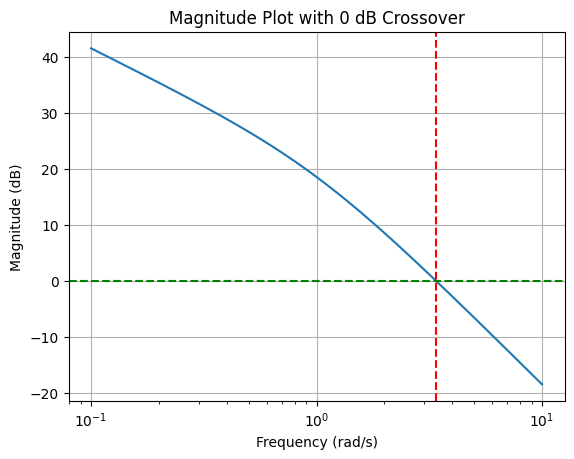

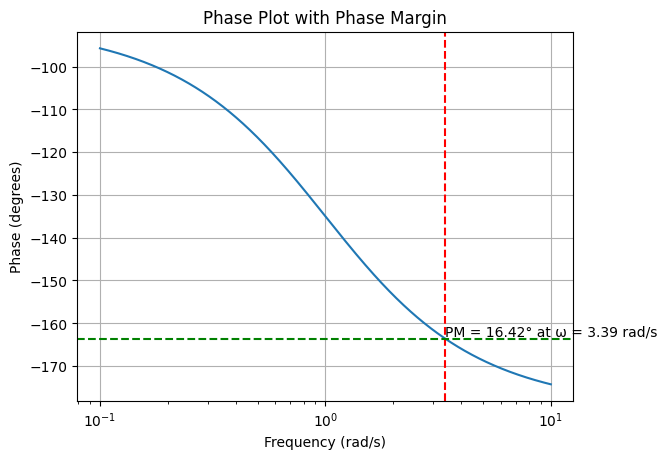

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as control

# Define the transfer function G(s) = 12 / (s*(s + 1))
numerator = [12]
denominator = [1, 1, 0]
G_s = control.TransferFunction(numerator, denominator)

# Generate Bode plot with margins
mag, phase, omega = control.bode(G_s, dB=True, Plot=False)

# Calculate margins for annotation
gm, pm, sm, gc = control.margin(G_s)
pm_deg = pm if pm > 0 else pm + 360  # Ensure phase margin is positive for display

# Convert magnitude from absolute to dB
mag_dB = 20 * np.log10(mag)

# Plotting magnitude
plt.figure()
plt.semilogx(omega, mag_dB)
plt.axhline(y=0, color='g', linestyle='--')  # 0 dB line
plt.axvline(x=gc, color='r', linestyle='--')  # Gain crossover frequency line
plt.title('Magnitude Plot with 0 dB Crossover')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

# Plotting phase
plt.figure()
plt.semilogx(omega, phase * (180/np.pi))  # Convert phase from radians to degrees
plt.axvline(x=gc, color='r', linestyle='--')  # Gain crossover frequency line
plt.axhline(y = -180 + pm_deg, color = 'g', linestyle = '--')  # Phase Margin line
plt.text(gc, -180 + pm_deg, f'PM = {pm_deg:.2f}° at ω = {gc:.2f} rad/s', va='bottom')
plt.title('Phase Plot with Phase Margin')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Phase (degrees)')
plt.grid(True)

plt.show()


- To grasp the system's behavior, we sketch the Bode plot, focusing first on the magnitude plot. The term $\frac{12}{j\omega}$ indicates a slope of $-20$ dB per decade starting from the origin, representing the system's initial roll-off due to the single integrator term. 

- The additional term, $j\omega + 1$, introduces a pole at $\omega = 1$, further steepening the slope to $-40$ dB per decade beyond this corner frequency.

- For the phase angle plot, our system exhibits characteristic shifts due to its pole at $\omega = 1$. 
Initially, the phase begins at $-90^\circ$ (due to the integrator), and the introduction of the pole at $\omega = 1$ further decreases the phase, approaching $-180^\circ$. 

- This behavior is typical of a Type-1 system, which shows a phase transition from $-90^\circ$ to $-180^\circ$ as the frequency increases.

- Upon analyzing the system's phase behavior, we note that our current setup yields a phase margin of approximately $15^\circ$. 

- However, our design specification requires a phase margin of $40^\circ$, indicating that we are currently $25^\circ$ short of our target. This discrepancy highlights the need for compensatory measures to enhance the system's phase margin to the desired level.

### Adding the Controller

When you cascade (or combine) two systems, such as adding a lead compensator to an existing system, the resulting Bode plot is effectively the sum of the individual Bode plots of those systems. This additive property is particularly useful in the logarithmic scale used in Bode plots, where the multiplication of transfer functions (as in cascading systems) translates into the addition of their magnitudes and phases.

### Strategic Placement of Maximum Phase Lead ($\omega_m$)

We can then leverage the lead compensator to achieve a desired phase margin. The phase lead provided by the compensator peaks at a specific frequency, denoted $\omega_m$. 

By aligning this peak phase lead ($\phi_m$) with the critical point on the system's frequency response where we want to enhance the phase margin, the compensator can effectively improve the system's stability.

- **Phase Lead Placement**: The goal is to position the phase lead ($\phi_m$) provided by the lead compensator at a frequency where it can most effectively increase the system's phase margin. This involves adjusting the compensator's parameters so that $\omega_m$ aligns with the frequency at which the system needs increased phase support.

- **Achieving Desired Phase Margin**: The phase margin ($\phi_{pm}$) of a system is a measure of its stability, with larger margins generally indicating greater stability. By adding the lead compensator and correctly positioning its $\omega_m$, we can ensure that the system achieves a specific target phase margin, in this case, $25^\circ$, thereby enhancing the system's robustness against oscillations and ensuring better performance.

### The Challenge of Achieving the Desired Phase Margin

In our control system design, we aim to achieve a specific phase margin through the strategic use of a lead compensator. We've decided that the compensator should provide a phase lead ($\phi_m$) of 25 degrees to meet our phase margin requirements. However, careful consideration reveals potential challenges with this approach.

By integrating a lead compensator to add a phase lead of 25 degrees at a particular frequency ($\omega_m$), we intend to increase the system's phase margin to 40 degrees. But, there's a catch. When we add the lead compensator, not only does it contribute to the phase, but it also affects the system's gain. This interaction can inadvertently shift the gain crossover frequency towards higher frequencies.

### The Problem Explained

- **Gain and Phase Addition**: Introducing a lead compensator influences both the phase and gain of the system. Ideally, we want to place the maximum phase lead exactly where it's needed. However, this addition also brings an increase in gain at the corresponding frequency.
  
- **Shift in Crossover Frequency**: The increased gain at the target frequency might push the gain crossover frequency to the right (towards higher frequencies). This shift is crucial because it can alter the phase margin we aim to achieve.
  
- **Impact on Phase Margin**: Suppose the original system provided a phase of 15 degrees at the gain crossover frequency, and we anticipated that adding 25 degrees of phase lead would suffice. Due to the shift in crossover frequency, the actual contribution from the original system may decrease, potentially leaving us short of the desired 40 degrees of phase margin.

### Solution: Adjusting for Safety Margin

To counteract this potential shortfall, we introduce a safety margin by adjusting our target phase lead upwards. Instead of aiming for 25 degrees, we target a higher phase lead ($\phi_m$) of 30 degrees, accounting for 5 degrees of safety margin. This adjustment helps ensure that even with the shift in crossover frequency, we can still achieve or surpass our desired phase margin of 40 degrees.

### Calculating Compensator Parameters

With this revised target, the required phase lead $\phi_m$ is not just based on the desired phase margin ($\phi_{pm}$) but also includes a buffer ($\epsilon$), resulting from potential phase reduction due to the gain crossover shift. 

Hence, we calculate $\phi_m$ (the required phase lead) as:

$$ \phi_m = \phi_{pm} - \phi_{uncompensated} + \epsilon $$

Given $\phi_{pm} = 40^\circ$, $\phi_{uncompensated} = 15^\circ$, and $\epsilon = 5^\circ$, we find $\phi_m = 30^\circ$. This calculation guides us in setting the compensator parameters, specifically $\alpha$, to achieve the necessary phase lead.

In thi case:

$$
\alpha = \frac{1-\sin(30)}{1+\sin(30)} = 0.334
$$


### Comments

- This approach underlines the iterative nature of control system design, blending theoretical calculations with practical considerations to navigate the complexities of achieving desired system behavior. 
- The example illustrates the importance of flexibility and adjustment in design parameters to meet specific performance criteria, showcasing the adaptability required in effective control system design.

### Determining the Time Constant ($\tau$)

After deciding on the phase lead ($\phi_m$) provided by the compensator, the next step is to determine the appropriate time constant ($\tau$) for the compensator. This is crucial because $\tau$ influences the frequency ($\omega_m$) at which the compensator provides the maximum phase lead.

### The Concept of Gain Crossover Frequency

The gain crossover frequency ($\omega_{gc}$) is the frequency at which the system's gain crosses the 0 dB line. Ideally, after adding the lead compensator, $\omega_m$ should align with a new gain crossover frequency, enhancing the system's phase margin to the desired level.

However, an important consideration is how the addition of gain from the compensator affects the system's gain crossover frequency, potentially shifting it. This shift is important because it directly impacts the system's phase margin.

### Adjusting for the New Gain Crossover Frequency

In the scenario where we aim for a phase margin increase, it's noted that the compensator will also add gain at $\omega_m$. 

Specifically, the compensator adds a magnitude of $4.8$ dB at $\omega_m$, calculated as $10 \log \frac{1}{\alpha}$ (see picture above).

To accommodate this, we anticipate that the new gain crossover frequency ($\omega_{gc}'$) will be where the original, uncompensated system's gain is $-4.8$ dB. 

This adjustment ensures that when the compensator's gain is added, the total system gain at $\omega_{gc}'$ will cross the 0 dB threshold, achieving the new gain crossover frequency.

### Calculating $\tau$

To find $\tau$, we consider that $\omega_m$ (where we place the compensator's maximum phase lead) should ideally be at $\omega_{gc}'$. Given the relationship between $\omega_m$ and $\tau$, and knowing the desired new crossover frequency from our adjustments, we can solve for $\tau$.

Given a gain adjustment of $4.8$ db, the new the new crossover frequency is determined to be $4.6$ radians per second.

Finally, we use the formula relating $\omega_m$ and $\tau$ to calculate the exact value of $\tau$:

$$\omega_m = \sqrt{\frac{1}{\tau} \frac{1}{\alpha \tau}} = 4.6$$ 


</table>
<tr>
    <td>
        <img src="./pics/30_Compensator_Design_Using_Frequency_Response_Plots_lead_compensator_bode_plot_1.png" alt="30_Compensator_Design_Using_Frequency_Response_Plots_lead_compensator_bode_plot_1" style="width:550px;"/>
    </td>      
</tr>
</table>  


and the controller is:

$$
D(s) = \frac{0.376s+1}{0.128s+1}
$$


### Optimization and Verification

It is important to verify that the compensator meets the phase margin requirement without unduly sacrificing system bandwidth.

Optimizing the control system design is an iterative process. After implementing the compensator, we need to re-evaluate the system's phase margin and gain crossover frequency. 

If the phase margin achieved is slightly above or below the target, minor adjustments might be necessary. This iterative refinement ensures the system meets design specifications while maintaining a balance between performance and stability.

The system we need to verify is now the open-loop transfer function of the compensated system:

$$
KG(s)D(s) = \frac{12}{s(s+1)}\frac{0.376s+1}{0.128s+1}
$$


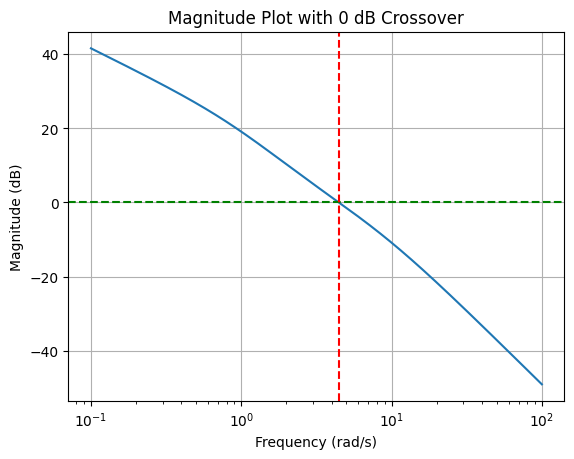

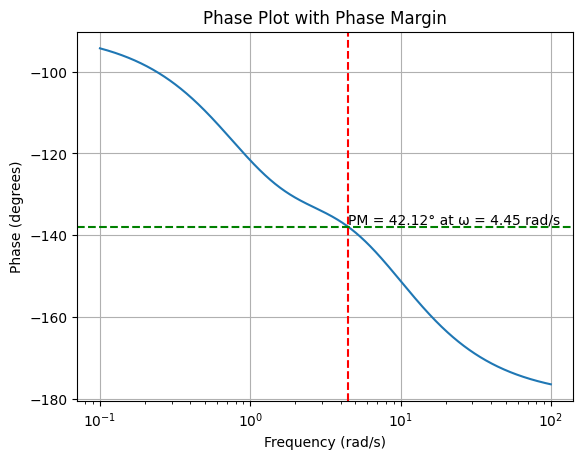

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as control

# Define the transfer function G(s) = 12 / (s(s + 1))
numerator_G = [12]
denominator_G = [1, 1, 0]
G_s = control.TransferFunction(numerator_G, denominator_G)

# Define the transfer function D(s) = (0.376s + 1) / (0.128s + 1)
numerator_D = [0.376, 1]
denominator_D = [0.128, 1]
D_s = control.TransferFunction(numerator_D, denominator_D)

# Combine G(s) and D(s) to get the overall open-loop transfer function KG(s)D(s)
KGD_s = G_s * D_s

# Generate Bode plot with margins
# Generate Bode plot with margins for the combined transfer function
# mag, phase, omega = control.bode(KGD_s, dB=True)
mag, phase, omega = control.bode(KGD_s, dB=True, Plot=False)

# Calculate margins for annotation
gm, pm, sm, gc = control.margin(KGD_s)
pm_deg = pm if pm > 0 else pm + 360  # Ensure phase margin is positive for display

# Convert magnitude from absolute to dB
mag_dB = 20 * np.log10(mag)

# Plotting magnitude
plt.figure()
plt.semilogx(omega, mag_dB)
plt.axhline(y=0, color='g', linestyle='--')  # 0 dB line
plt.axvline(x=gc, color='r', linestyle='--')  # Gain crossover frequency line
plt.title('Magnitude Plot with 0 dB Crossover')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

# Plotting phase
plt.figure()
plt.semilogx(omega, phase * (180/np.pi))  # Convert phase from radians to degrees
plt.axvline(x=gc, color='r', linestyle='--')  # Gain crossover frequency line
plt.axhline(y = -180 + pm_deg, color = 'g', linestyle = '--')  # Phase Margin line
plt.text(gc, -180 + pm_deg, f'PM = {pm_deg:.2f}° at ω = {gc:.2f} rad/s', va='bottom')
plt.title('Phase Plot with Phase Margin')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Phase (degrees)')
plt.grid(True)

plt.show()


### Importance of Verification

Once you've calculated the compensator's parameters, including the time constant ($\tau$) and adjusted for the new gain crossover frequency ($\omega_{gc}'$), a thorough check of the system's performance is necessary. This step is to validate whether the adjustments have indeed realized the target phase margin.

### Adjusting for Safety Margin ($\epsilon$)

During the design, a safety margin ($\epsilon$) is considered to account for uncertainties or approximations in calculations. If, upon verification, the actual phase margin achieved deviates from the target, adjustments may be needed. 

- **If the phase margin is higher** than the target (for example, achieving 42 or 43 degrees when the target is 40 degrees), this is generally acceptable. It indicates the system is potentially more stable than initially required, which is often beneficial.
  
- **If the phase margin is slightly lower** (say, 38 or 39 degrees instead of 40 degrees), while not ideal, it might still be acceptable depending on the system's overall performance and stability requirements. 

This flexibility in the design process acknowledges that while we strive to meet specific targets, practical considerations and the inherent complexity of dynamic systems may lead to slight deviations from these ideals.

### Iterative Design Process

The design and optimization of a control system, especially when integrating components like lead compensators, is inherently iterative. After initial calculations and system adjustments:

1. **Perform simulations** or generate Bode plots to assess how the compensator influences the system's phase margin and bandwidth.
   
2. **Evaluate the results** against the desired specifications. If the system's phase margin is within a reasonable range of the target, consider whether further adjustments are necessary.

3. **Consider adjusting $\epsilon$**, the safety margin, if initial results are not satisfactory. Increasing $\epsilon$ may provide additional buffer to achieve the desired phase margin, especially if initial assumptions were too conservative or if the system response varies from theoretical predictions.

### Comment
- If a phase margin of 40 degrees is required, why not aim for a larger margin, like 50 or 60 degrees, to increase system stability? 

#### Understanding Phase Margin and Its Impact

The phase margin is a measure of system stability, with a higher phase margin generally indicating a more stable system. However, increasing the phase margin beyond certain limits comes with trade-offs:

1. **Shift in Crossover Frequency**: Increasing the phase margin typically involves shifting the gain crossover frequency (\(\omega_{gc}\)). The gain crossover frequency is a critical parameter that influences the system's bandwidth. As the phase margin increases, the crossover frequency tends to decrease, which can reduce the system's bandwidth.

2. **Bandwidth Limitations**: The system's bandwidth determines how quickly it can respond to changes. A larger bandwidth allows for faster response but can also introduce more noise into the system, potentially affecting performance. There's often a practical limit to how much bandwidth is beneficial or necessary for a given application.

3. **Noise Filtering Considerations**: High-bandwidth systems are more susceptible to noise, necessitating additional noise filtering measures. This can complicate the system design and potentially introduce more points of failure or inefficiency.

4. **Trade-offs with Other Requirements**: Designing a control system involves balancing various requirements, including stability, responsiveness, and noise immunity. Increasing the phase margin significantly may compromise other aspects of system performance, such as responsiveness or noise handling.

#### Design Philosophy: Meeting Specifications on the Boundary

- In practice, when design specifications are given, the goal is usually to meet these specifications as closely as possible without exceeding them unnecessarily. This approach ensures that the system is optimized for the intended application without over-engineering for stability at the expense of other performance metrics. By designing to meet specifications on the boundary, engineers can provide adequate safety margins for stability while preserving system performance and efficiency.

- While aiming for a higher phase margin than required might seem like an effective way to ensure system stability, it's essential to consider the associated trade-offs. The optimal design balances stability with performance, ensuring the system meets its intended function efficiently and effectively without unnecessary compromises. In cases where stability and bandwidth are both critical, a nuanced approach to system design is necessary to achieve the best overall performance.

#### Understanding Bandwidth from Bode and Nichols Charts

**Bandwidth and Bode Plot**: The Bode plot is a fundamental tool in control system analysis, offering insights into how the system responds across different frequencies. While the gain crossover frequency (where the gain crosses the 0 dB line) hints at the system's bandwidth, it doesn't provide a complete picture. Bandwidth, which is the range of frequencies over which the system effectively operates, is influenced by how quickly the gain drops off beyond the crossover point.

**Nichols Chart for Detailed Bandwidth Analysis**: For a more precise determination of bandwidth, the Nichols chart is invaluable. It plots the system's gain and phase together, allowing you to identify the -3 dB contour. The intersection of the system's response curve with this -3 dB line gives a clear indication of the bandwidth. This method is particularly useful because it considers both gain and phase, offering a comprehensive view of the system's frequency response.

### The Design Cycle and Adjustments

Designing a control system, such as incorporating a lead compensator, is an iterative process. It involves making initial calculations, implementing changes, and then verifying if those adjustments meet the design requirements.

- **Initial Adjustments and Verifications**: After setting the compensator parameters, you should first verify if the phase margin meets the design goals. The phase margin is critical because it indicates the system's stability margin. If it's around the target value (e.g., 40 degrees), even if slightly higher or lower, the system is generally considered stable. 

- **Nichols Chart for Bandwidth Verification**: If the design also specifies a bandwidth requirement, translating the compensated system's data onto the Nichols chart helps verify if the design meets this criterion. If the actual bandwidth differs from the requirement, you might need to adjust the compensator's parameters.

### Iterative Refinements Based on Outcomes

- **Adjusting Safety Margin ($\epsilon$)**: The safety margin in the design accounts for uncertainties. If the phase margin or bandwidth isn't satisfactory, consider adjusting this margin. For instance, increasing $\epsilon$ might provide a larger buffer to achieve the desired phase margin, but it's essential to balance this against potential impacts on bandwidth.

- **Balancing Stability and Performance**: It's important to balance achieving a high phase margin with maintaining adequate bandwidth. A very high phase margin could unnecessarily restrict bandwidth, affecting the system's responsiveness. Thus, aiming for specifications that meet the system's operational requirements without excessive conservatism is key.

- **Feedback and Next Steps**: Should the design not meet all requirements after initial adjustments, the process entails revisiting the design parameters. This might involve a more nuanced adjustment of the compensator parameters or even considering additional compensatory measures, like a lag compensator, to satisfy all criteria.

----

### SIDEBAR - Bandwidth and Bode Plots

Using the Bode plot of the open-loop transfer function to determine the bandwidth of a control system can be misleading due to the fundamental differences between open-loop and closed-loop behaviors. Here's why the open-loop Bode plot isn't typically used to determine bandwidth:

### 1. **Definition of Bandwidth**:
Bandwidth is conventionally defined as the range of frequencies over which the closed-loop system maintains a certain level of performance, often measured as the frequency range within which the system's gain stays within 3 dB of its low-frequency value. This concept inherently applies to how the system responds when it's operating in a closed-loop configuration because it's about the system's ability to follow its input.

### 2. **Feedback Effects**:
Feedback significantly alters the system's frequency response. An open-loop system might show a certain gain and phase characteristic that changes drastically once feedback is applied. The closed-loop response can exhibit reduced gain at high frequencies, improved stability margins, and altered resonance characteristics, none of which are apparent in the open-loop Bode plot.

### 3. **Stability and Performance**:
Closed-loop stability and performance metrics such as phase margin and gain margin are directly visible and measurable on the closed-loop Bode plot. These metrics are critical for understanding the system's robustness and its ability to reject disturbances or handle variations in system dynamics. The open-loop Bode plot provides some predictive insight into these metrics, but it doesn't show the actual closed-loop behavior.

### 4. **Real-world Relevance**:
The closed-loop configuration is what is actually implemented in most control systems to achieve desired performance and stability. Therefore, analyzing the Bode plot of the closed-loop system gives a more accurate and relevant depiction of how the system will perform in real-world conditions, including its bandwidth.

### 5. **Misinterpretation Risk**:
Relying solely on the open-loop Bode plot might lead to misinterpretations about the system's ability to process signals across different frequencies. For example, an open-loop system might appear to have a wide bandwidth because of high gain at higher frequencies. However, once feedback is considered, the effective bandwidth (where the system accurately follows the input) might be significantly narrower due to the gain reduction introduced by feedback.

### Conclusion:
While the open-loop Bode plot is valuable for designing and understanding certain aspects of control systems, such as potential stability and the general shape of the frequency response, it cannot accurately determine closed-loop bandwidth. Closed-loop analysis is essential for an accurate representation of system performance, making the closed-loop Bode plot the preferred tool for bandwidth determination and overall system analysis.

--- END OF SIDEBAR

----

### Questions for Reinforcement

1. **Pop-up Question**: What is the primary purpose of a lead compensator in control system design?
   - **Answer**: To improve the transient response of a system by introducing a phase lead, which can help meet desired performance specifications such as reduced overshoot and improved settling time.

2. **Pop-up Question**: How does the parameter $\alpha$ affect the performance of a lead compensator?
   - **Answer**: The parameter $\alpha$ controls the separation between the pole and zero of the compensator. A smaller $\alpha$ value increases the distance between the pole and zero, enhancing the compensator's phase-lead characteristic and its impact on system performance.


----

## Chapter on Lag Compensators

After having discussed the lead compensators, we now turn our attention to their counterparts: lag compensators. While lead compensators are designed to improve the transient response by adding phase lead, lag compensators serve a different purpose. **They are primarily used to enhance the steady-state accuracy of a control system without significantly degrading its transient performance.**

## The Principle of Lag Compensation

Lag compensators are characterized by a transfer function that introduces a phase lag over a specific frequency range. This is achieved by adding a pole-zero pair to the system, where the pole is placed closer to the origin on the s-plane than the zero. The general form of a lag compensator's transfer function can be represented as:

$$ D(s) = \frac{\tau s + 1}{\beta \tau s + 1} $$

where $\tau > 0$ and $\beta > 1$. The factor $\beta$ determines the distance between the pole and the zero, with larger values indicating a greater separation.


</table>
<tr>
    <td>
        <img src="./pics/30_Compensator_Design_Using_Frequency_Response_Plots_lag_compensator.png" alt="30_Compensator_Design_Using_Frequency_Response_Plots_lag_compensator" style="width:550px;"/>
    </td>      
</tr>
</table>  

### Frequency Domain Analysis of Lag Compensators

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from ipywidgets import interact, FloatSlider

# Function to plot the Bode plot of the lag compensator with annotations
def plot_lag_compensator_with_annotations(tau=1.0, beta=2.0):
    # Define the transfer function of the lag compensator
    numerator = [tau, 1]
    denominator = [tau*beta, 1]
    system = signal.TransferFunction(numerator, denominator)
    
    # Generate Bode plot data
    frequencies = np.logspace(-2, 2, 400)
    w, mag, phase = signal.bode(system, w=frequencies)
    
    # Calculate corner frequencies
    corner_freq_zero = 1/tau
    corner_freq_pole = 1/(tau*beta)
    
    # Plotting
    plt.figure(figsize=(14, 6))
    
    ## Magnitude plot
    plt.subplot(1, 2, 1)
    plt.semilogx(w, mag) # Bode magnitude plot
    plt.title('Magnitude Plot of Lag Compensator')
    plt.xlabel('Frequency [rad/s]')
    plt.ylabel('Magnitude [dB]')
    plt.grid(which='both', axis='both')
    
    # Annotations for magnitude plot
    plt.axvline(x=corner_freq_zero, color='r', linestyle='--')
    plt.axvline(x=corner_freq_pole, color='g', linestyle='--')
    plt.text(corner_freq_zero, min(mag), r'$\frac{1}{\tau}$', horizontalalignment='right', color='red')
    plt.text(corner_freq_pole, min(mag), r'$\frac{1}{\beta\tau}$', horizontalalignment='right', color='green')
    
    ## Phase plot
    plt.subplot(1, 2, 2)
    plt.semilogx(w, phase) # Bode phase plot
    plt.title('Phase Plot of Lag Compensator')
    plt.xlabel('Frequency [rad/s]')
    plt.ylabel('Phase [degrees]')
    plt.grid(which='both', axis='both')
    
    # Annotations for phase plot
    plt.axvline(x=corner_freq_zero, color='r', linestyle='--')
    plt.axvline(x=corner_freq_pole, color='g', linestyle='--')
    plt.text(corner_freq_zero, min(phase), r'$\frac{1}{\tau}$', horizontalalignment='right', color='red')
    plt.text(corner_freq_pole, min(phase), r'$\frac{1}{\beta\tau}$', horizontalalignment='right', color='green')
    
    plt.show()

# Interactive widget
interact(plot_lag_compensator_with_annotations, 
         tau=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Tau (τ)'),
         beta=FloatSlider(value=2.0, min=1.01, max=10.0, step=0.05, description='Beta (β)'));


interactive(children=(FloatSlider(value=1.0, description='Tau (τ)', max=10.0, min=0.1), FloatSlider(value=2.0,…

#### Magnitude Response

The Bode plot for a lag compensator reveals how it affects the system's frequency response. 

The first corner frequency occurs at $\omega = \frac{1}{\beta \tau}$, corresponding to the pole, and results in a decrease in magnitude. 

The second corner frequency, at $\omega = \frac{1}{\tau}$, corresponds to the zero, partially compensating for the decrease. However, the net effect over the entire frequency range is minimal, except for the phase lag introduced.

#### Phase Response

The phase plot of a lag compensator showcases its primary characteristic: the introduction of phase lag within a certain frequency range. This lagging effect is most pronounced between the pole and zero frequencies, after which the system's phase response begins to normalize.

**Pop-up Question**: What is the main use of a lag compensator in control systems?
- **Answer**: A lag compensator is mainly used to improve the steady-state error of a control system without significantly affecting its transient response. It introduces a phase lag that is carefully managed to avoid negative impacts on the system's overall performance.

### Design Considerations and Application

When designing a lag compensator, one must carefully select the values of $\tau$ and $\beta$ to achieve the desired steady-state performance without compromising the system's stability or responsiveness. The goal is to enhance the system's gain at low frequencies (for improved steady-state accuracy) while maintaining an acceptable phase margin.

In practice this means that we will not be using the lag part to be important for our compensation. For this reason, we do not need to understand exactly when the maximum lag will occur.


### Design Example: Enhancing Phase Margin and Bandwidth

Consider a system with a transfer function 

$$G(s) = \frac{K}{s(s+1)(s+4)}$$

that we can re-write as:

$$G(j\omega) = \frac{K/4}{j\omega(j\omega + 1)(0.25j\omega + 1)}$$

where the design objectives include a phase margin of $\phi_{pm}=43^\circ$, a bandwidth of $\omega_b=1.02$ radians per second, and a velocity error constant $K_v \geq 5$.

**Step 1: Satisfying $K_v$ Requirement**

The first step involves adjusting the system gain $K$ to meet the $K_v$ requirement. For instance, if $K_v = 5$ dictates $K = 20$, the modified transfer function becomes:

$$G(j\omega) = \frac{5}{j\omega(j\omega + 1)(0.25j\omega + 1)}$$

**Step 2: Asymptotic Sketch and Phase Margin Adjustment**

An asymptotic sketch of the uncompensated system helps visualize the necessary adjustments. 

It is easy to draw the Bode plots (corner frequencies are $\omega=1$ and $\omega=4$.

In [ ]:
import numpy as np

# Define the polynomials as sequences of coefficients
# For s, the polynomial is s, represented as [1, 0]
# For s + 1, the polynomial is represented as [1, 1]
# For 0.25s + 1, the polynomial is represented as [0.25, 1]

# Perform polynomial multiplication
result_poly = np.polymul([1, 0], [1, 1])  # Multiply s and (s + 1)
result_poly = np.polymul(result_poly, [0.25, 1])  # Multiply the result by (0.25s + 1)

# Print the resulting polynomial
print("The resulting polynomial coefficients are:", result_poly)


The resulting polynomial coefficients are: [0.25 1.25 1.   0.  ]


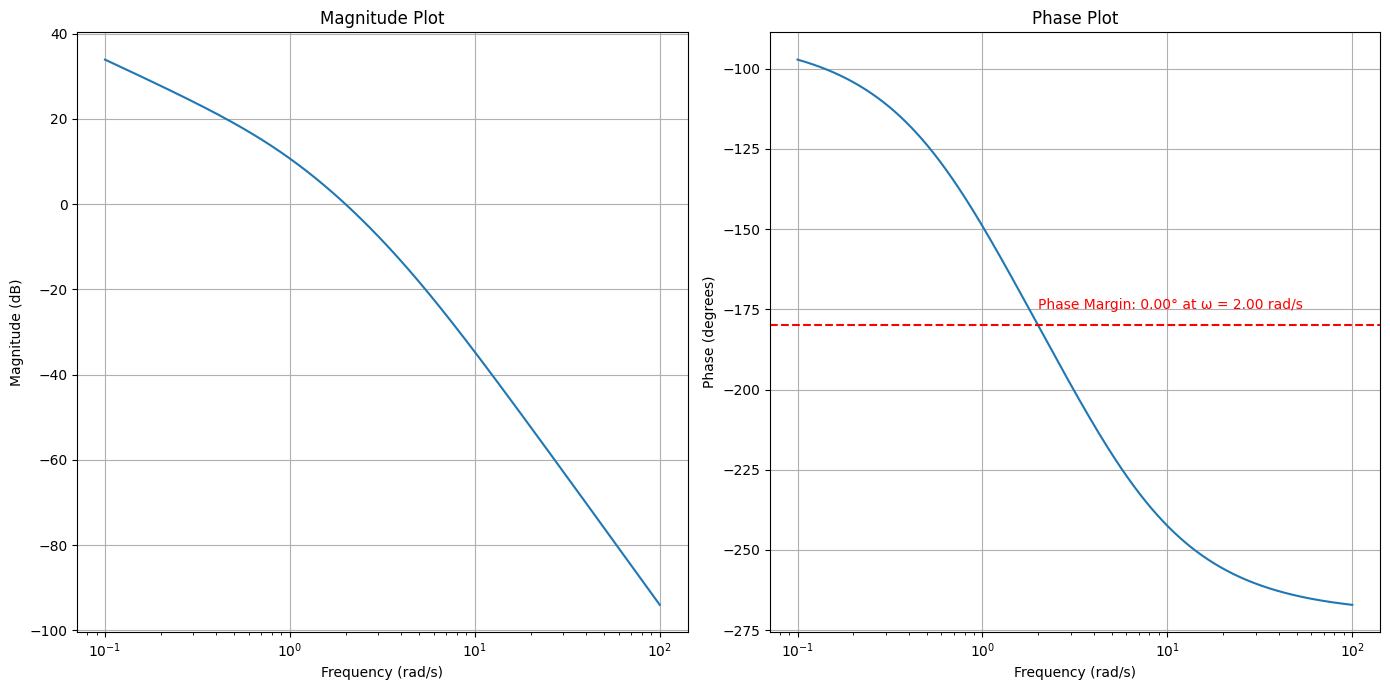

Phase Margin: 0.00° at ω = 2.00 rad/s


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control

# Define the transfer function G(s) = 5 / (s(s + 1)(0.25s + 1))
numerator = [5]
denominator = [0.25, 1.25, 1.,   0.]  # Corresponds to 0.25s^3 + 1.25s^2 + s
G_s = control.TransferFunction(numerator, denominator)

# Generate Bode plot with margins
mag, phase, omega = control.bode(G_s, dB=True, Plot=False)

# Calculate margins for annotation
gm, pm, sm, gc = control.margin(G_s)
pm_deg = pm if pm > 0 else pm + 360  # Ensure phase margin is positive for display

# Plotting
plt.figure(figsize=(14, 7))

## Magnitude plot
plt.subplot(1, 2, 1)
plt.semilogx(omega, 20*np.log10(mag))
plt.title('Magnitude Plot')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

## Phase plot
plt.subplot(1, 2, 2)
plt.semilogx(omega, np.rad2deg(phase))
plt.title('Phase Plot')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Phase (degrees)')
plt.grid(True)

# Display the phase margin on the plot
plt.axhline(y = -180 + pm_deg, color = 'r', linestyle = '--')
plt.text(gc, -180 + pm_deg + 5, f'Phase Margin: {pm_deg:.2f}° at ω = {gc:.2f} rad/s', color = 'red')

plt.tight_layout()
plt.show()

# Print the phase margin value
print(f"Phase Margin: {pm_deg:.2f}° at ω = {gc:.2f} rad/s")


where the phase angle curve is:

$$
\phi = -90 - tan^{-1}(\omega) - tan^{-1}(0.25\omega)
$$

To increase the phase margin to the required $43^\circ$, one might consider shifting the low-frequency region of the Bode plot downwards. This approach hints at utilizing a lag compensator to pull the gain crossover frequency to the left, thereby increasing the phase margin.

**Pop-up Question**: Why is it preferable to place the maximum attenuation of a lag compensator at the low-frequency region?
- **Answer**: Placing the maximum attenuation at the low frequency ensures that the steady-state gain of the system is increased without significantly affecting the high-frequency gain. This strategy improves the system's phase margin by ensuring that the gain crossover frequency shifts leftward, aligning with the desired phase margin improvement.

Note that the phase margin means that the system, with the selected $K$, has become unstable.

### Step 3. Incorporating the Lag Compensator

The crux of lag compensation lies in strategically introducing phase lag at low frequencies without excessively diminishing the bandwidth. 

This is accomplished by ensuring the compensator's corner frequency is positioned judiciously relative to the desired phase margin frequency.

The **crossover frequency** is where the system's gain crosses a certain threshold, typically the 0 dB line. This frequency is a cornerstone in determining the system's phase margin and bandwidth.

#### Lag Compensator: Reducing Bandwidth

A lag compensator is employed to improve the system's steady-state error without significantly degrading its transient response. However, it introduces a phase lag and decreases the system's gain at higher frequencies. This decrease in gain at higher frequencies causes the gain crossover frequency to shift left (towards lower frequencies), inherently reducing the system's bandwidth.

**Key Points**:
- **Phase Lag**: Lag compensators introduce a phase lag, predominantly affecting lower frequency ranges.
- **Decrease in Bandwidth**: By pulling down the low-frequency region of the gain plot, the gain crossover frequency decreases, leading to a reduction in bandwidth. This also makes it possible to improve the phase margin.

#### Lead Compensator: Increasing Bandwidth

Conversely, a lead compensator aims to improve the transient response by introducing a phase lead. This compensator increases the system's gain at higher frequencies, causing the gain crossover frequency to shift right (towards higher frequencies), effectively increasing the system's bandwidth.

**Key Points**:
- **Phase Lead**: Lead compensators introduce a phase lead, beneficial for improving system stability.
- **Increase in Bandwidth**: Elevating the gain in the high-frequency region shifts the crossover frequency rightward, enhancing the bandwidth.

#### A General Guideline to Choose the Compensators

When faced with a design problem, choosing between a lag or lead compensator depends on the existing system characteristics and the desired outcomes:

- **Evaluating the Uncompensated System**: Begin by analyzing the uncompensated system's bandwidth. If it's significantly higher or lower than required, this analysis will guide the choice between adding a lag or lead compensator.
- **Balancing Phase Margin and Bandwidth**: In scenarios where both the phase margin and bandwidth do not meet the design criteria, a dual approach is adopted—first employing a lag compensator to adjust the phase margin, followed by a lead compensator to rectify the bandwidth.

##### A Dual-Compensator Approach

For comprehensive system tuning, it's feasible to divide the phase margin requirement into two segments—addressed by both lag and lead compensators. This dual-compensator approach allows for a nuanced tuning process, ensuring both stability (through phase margin adjustment) and responsiveness (through bandwidth optimization) are achieved.

In this case:
- We start from the design of the lag compensator, which meets the phase margin requirements
- Add lead section to increase the bandwidth

- **Split Phase Margin Requirement**: If a total phase margin of 60 degrees is needed, you might use a lag compensator to achieve the first 30 degrees, adjusting the gain crossover frequency and slightly impacting the bandwidth. Subsequently, a lead compensator can be employed to attain the remaining 30 degrees, ideally restoring or enhancing the bandwidth to meet the system requirements.

### Selecting the Corner Frequency

</table>
<tr>
    <td>
        <img src="./pics/30_Compensator_Design_Using_Frequency_Response_Plots_lag_compensator_1.png" alt="30_Compensator_Design_Using_Frequency_Response_Plots_lag_compensator_1" style="width:550px;"/>
    </td>      
</tr>
</table> 

- We want to new crossover frequency where the lag compensator provides the maximum attentuation (it is possible to verify that the maximum attenuation is: $20\log{\beta})$.
- The region of maximum attenuator however extends from $\frac{1}{\tau}$ to infinity. So what point should we take?

Lag compensators inherently introduce a phase lag, particularly noticeable at the corner frequency where the compensator's effect transitions from minimal to significant. This phase lag can detract from the system's overall phase margin, leading to less stability than intended. For example, aiming directly for a 43-degree phase margin without accounting for this phase lag could result in an actual margin lower than anticipated, such as 35 degrees, due to the negative contribution of the compensator.

### Strategy for Addressing Phase Lag

To counteract the unexpected reduction in phase margin due to the compensator's phase lag, the design process involves considering an additional safety margin (denoted as epsilon, $\epsilon$) on top of the desired phase margin. This approach means aiming for a higher phase margin during the design phase to ensure that, even after accounting for the phase lag introduced by the compensator, the system achieves the intended phase margin.

#### Example Implementation

In the given scenario, to achieve an effective phase margin of 43 degrees, the designer considers a safety margin of 12 degrees, leading to a target phase margin of 55 degrees before compensator effects. This adjusted target compensates for the phase lag introduced by the compensator, ensuring the final design meets the original stability requirements.

### Practical Considerations

- **Realization Challenges**: Additionally there are practical challenge of realizing specific compensator values, particularly $1/\tau$ and $1/\beta\tau$, using real components (like resistors and capacitors). Extreme values for these parameters could complicate the physical implementation of the compensator and this limits in practice their maximum value.
  
### Choosing the Corner Frequency

A strategic decision involves setting the corner frequency for the compensator's effect. 

The guideline is to place this frequency approximately two octaves below the frequency associated with the desired phase margin, based on a qualitative assessment rather than a strict formula. This rule of thumb helps balance between achieving the necessary phase margin adjustment and maintaining practical component values for the compensator.


The guideline suggests positioning this frequency approximately two octaves below the frequency where a phase margin of $43^\circ + \epsilon$ is desired (**each octave provides a frequency ratio of 2:1**), with $\epsilon$ representing a safety margin to account for the inherent phase lag introduced by the compensator.

In our example, aiming for a phase margin of $55^\circ$ (i.e., $43^\circ + 12^\circ$) leads to identifying $0.52$ radians per second as the critical frequency. Consequently, the corner frequency is set to $\frac{1}{\tau} = \frac{0.52}{4} = 0.13$ radians per second, fulfilling our qualitative guideline.

Trial and error might be required.

#### Choosing $\beta$

With the corner frequency established, the next step involves calculating the compensator's parameters, $\tau$ and $\beta$, to achieve the desired attenuation at the specified frequency. In this context, achieving a $20$ dB attenuation dictates that $\beta = 10$:

- The second parameter of the compensator comes from the maximum attenuation: $20\log{\beta}$.
- We want that at point $0.13$ the gain plot attenuates approximately $20$ db

$$20\log{\beta} = 20 \rightarrow \beta = 10$$

</table>
<tr>
    <td>
        <img src="./pics/30_Compensator_Design_Using_Frequency_Response_Plots_lag_compensator_2a.png" alt="30_Compensator_Design_Using_Frequency_Response_Plots_lag_compensator_2" style="width:550px;"/>
    </td>      
</tr>
</table> 


And hence the compensator parameters are:

- $\tau = 1/0.13=7.7$
- $\beta\tau = 10 \cdot 7.7 = 77$


$$D(s) = \frac{7.7s + 1}{77s + 1}$$

#### Step 4. Validation and Iteration

The final design phase entails validating the compensator's effectiveness by integrating $D(s)$ with the original system and analyzing the combined system's Bode plot. This step verifies whether the adjusted phase margin and bandwidth meet the design specifications.

##### Evaluating the Impact of Phase Lag
- **Assessing Phase Margin**: A key outcome of this analysis is observing the effect of the lag compensator on the system's phase margin. The phase lag introduced by $D(s)$ can potentially reduce the phase margin, which is critical for system stability. An adequate safety margin ($\epsilon$) is considered to ensure that the desired phase margin (e.g., 43 degrees) is achieved despite the inherent phase lag of the lag compensator.
- **Adjusting $\epsilon$**: The value of $\epsilon$ is finely tuned based on the Bode plot analysis to ensure that the actual phase margin closely aligns with the target phase margin. This process might require iterative adjustments based on observed outcomes.

### Bandwidth Considerations
- **Analyzing Bandwidth**: Another significant aspect checked after incorporating $D(s)$ is the system's bandwidth, particularly how it's affected by the lag compensator. The gain crossover frequency, where the system's gain crosses 0 dB, helps determine the bandwidth.
- **Making Adjustments**: If the resulting bandwidth slightly deviates from the desired bandwidth, minor adjustments to $\epsilon$ or other compensator parameters might suffice to align the bandwidth with the requirements.
- **Addressing Significant Discrepancies**: A substantial gap between the achieved and desired bandwidth may indicate the need for additional compensatory measures. This scenario suggests that the system, even with $D(s)$ incorporated, might still lack the required performance, prompting the design to be treated as if it were "uncompensated" or in need of further compensation.

### Integrating a Lead Compensator
- **Expanding the Compensatory Approach**: For cases where the lag compensator alone doesn't meet all performance criteria, particularly bandwidth, introducing a lead compensator might be necessary. This addition aims to complement the lag compensator by enhancing the system's bandwidth, thus achieving a balanced performance that meets both phase margin and bandwidth requirements.

**Pop-up Question**: Why is it crucial to add a safety margin ($\epsilon$) when designing a lag compensator?
- **Answer**: The safety margin accounts for uncertainties and non-idealities in the system's response, ensuring the compensator achieves the desired phase margin even when unforeseen variations occur.
